<a href="https://colab.research.google.com/github/KPorus/machine-learning-and-python/blob/main/diabates_using_LogisticRegression_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Key Metrics to Compare Models:
**Accuracy:** This tells you how many times the model made the correct prediction out of all predictions. It shows overall correctness but doesn't tell the full story when you're looking at specific cases, like people with or without diabetes.

**Precision:** This tells you, when the model says someone has diabetes, how often it’s actually correct. High precision means fewer false alarms (false positives), i.e., saying someone has diabetes when they don’t.

**Recall:** This tells you, out of all the people who truly have diabetes, how many the model correctly identified. High recall means the model is good at finding people with diabetes, even if it sometimes makes a mistake and says someone has diabetes when they don’t (false positives).

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

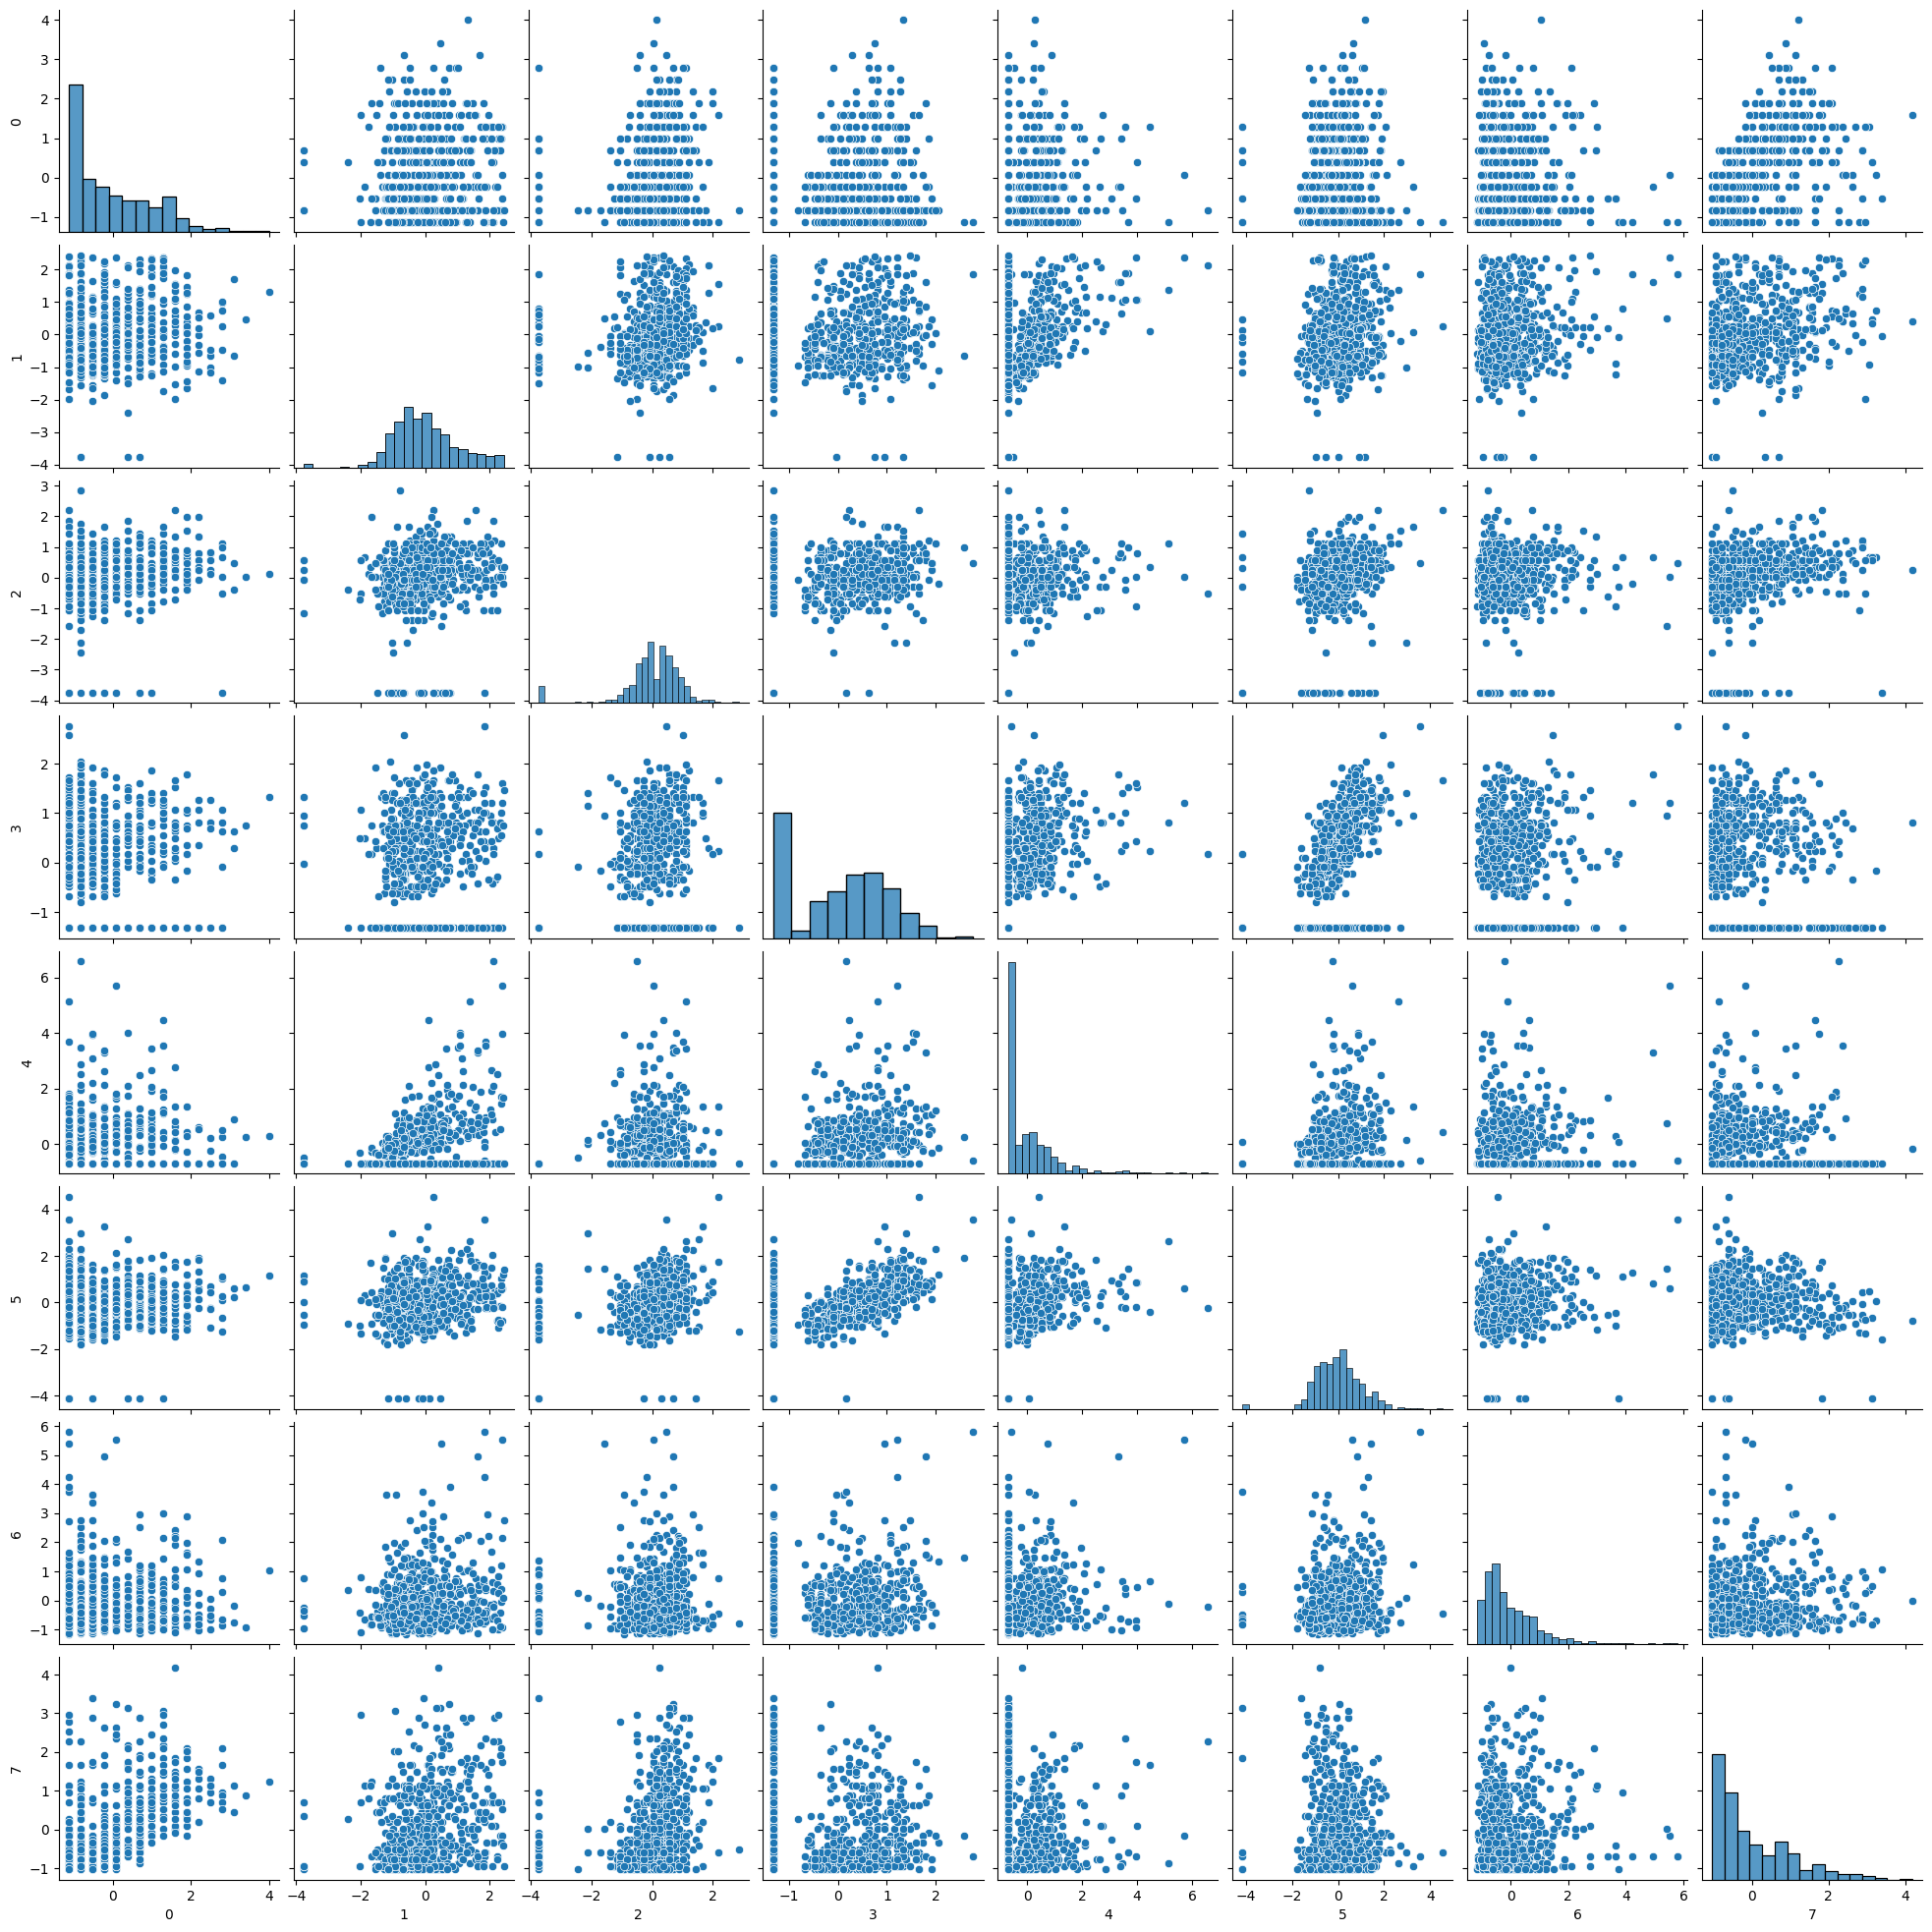

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
# Convert x_train to a Pandas DataFrame
x_train = pd.DataFrame(x_train)
sns.pairplot(x_train)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#LogisticRegression

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
x_train_p = poly.fit_transform(x_train)
x_test_p = poly.transform(x_test)

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_p, y_train)

LogisticRegression()

In [71]:
lr.score(x_train_p, y_train)

0.7703583061889251

In [72]:
lr.score(x_test_p,y_test)

0.7532467532467533

#KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [152]:
knn = KNeighborsClassifier(n_neighbors=50,p=2)
knn.fit(x_train_p, y_train)
knn.score(x_train_p, y_train)

0.7638436482084691

In [153]:
knn.score(x_test_p, y_test)

0.7662337662337663

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# For KNN
knn_predictions = knn.predict(x_test_p)
accuracy_knn = accuracy_score(y_test, knn_predictions)
precision_knn = precision_score(y_test, knn_predictions)
recall_knn = recall_score(y_test, knn_predictions)

# For Logistic Regression
lr_predictions = lr.predict(x_test_p)
accuracy_lr = accuracy_score(y_test, lr_predictions)
precision_lr = precision_score(y_test, lr_predictions)
recall_lr = recall_score(y_test, lr_predictions)

print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)


KNN Accuracy: 0.7662337662337663
KNN Precision: 0.7567567567567568
KNN Recall: 0.509090909090909
Logistic Regression Accuracy: 0.7532467532467533
Logistic Regression Precision: 0.6491228070175439
Logistic Regression Recall: 0.6727272727272727
